In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import configs
import os
from scipy.stats import sem
import matplotlib.cm as cm
import torch
from umap import UMAP
from deer.agent import NeuralAgent
from deer.learning_algos.CRAR_torch import CRAR  
import deer.controllers as bc 
import yaml
from scipy.stats import pearsonr
from deer.policies import EpsilonGreedyPolicy, FixedFigure8Policy  

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
from deer.environments.Figure8 import MyEnv as Env

In [3]:
import torch
torch.cuda.is_available = lambda : False

In [16]:
engram_dir = '/Volumes/aronov-locker/Ching/rl/'
engram_dir = '/mnt/smb/locker/aronov-locker/Ching/rl/'
internal_dim = 10
generic_exp_name = 'noisy_altT_eps0.5_volweight' #'noisy_altT_eps0.5_volweight' #'noisy_altT'
exp_name = f'{generic_exp_name}_dm_dim{internal_dim}'
latents_dir = f'{engram_dir}latents/{exp_name}/'
nnets_dir = f'{engram_dir}nnets/{exp_name}/'
pickle_dir = f'{engram_dir}pickles/{exp_name}/'

# Run test experiments

noisy_altT_eps0.5_volweight_mb_30


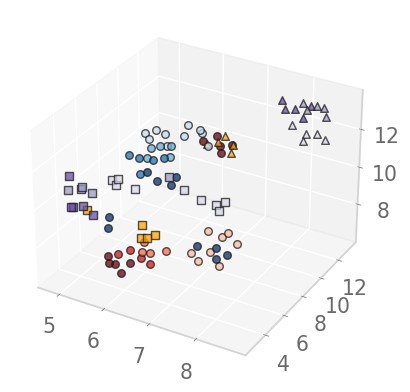

noisy_altT_eps0.5_volweight_mf_23


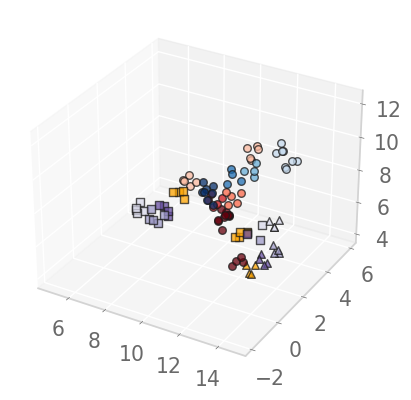

noisy_altT_eps0.5_volweight_mf_24


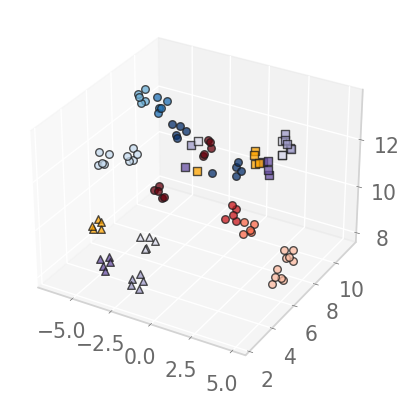

noisy_altT_eps0.5_volweight_mb_23


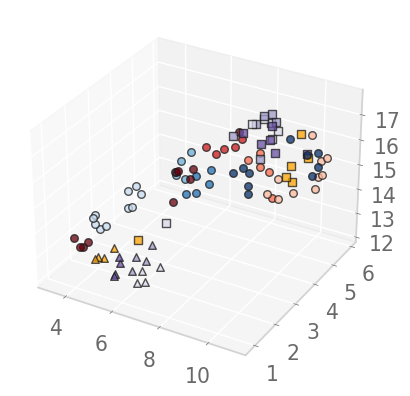

noisy_altT_eps0.5_volweight_mb_21


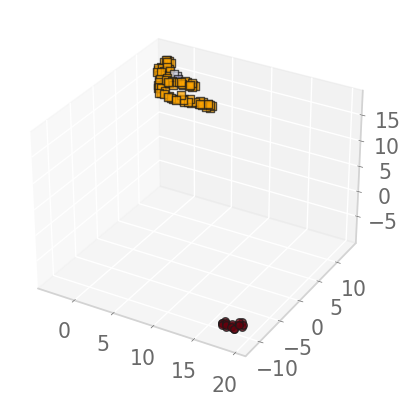

noisy_altT_eps0.5_volweight_mb_26


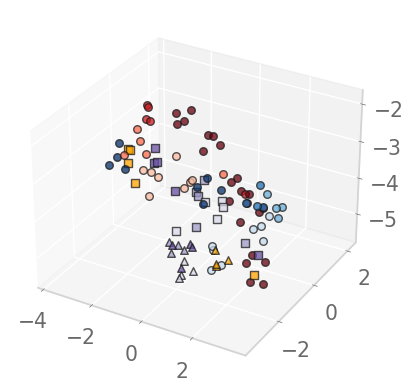

noisy_altT_eps0.5_volweight_mf_16


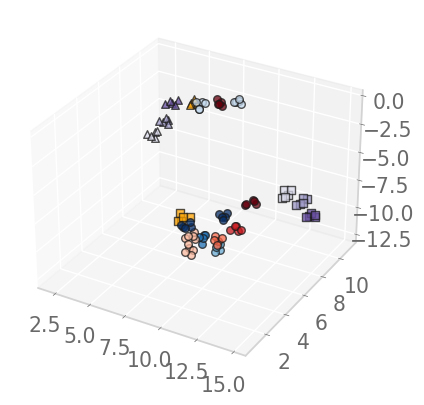

noisy_altT_eps0.5_volweight_mf_10


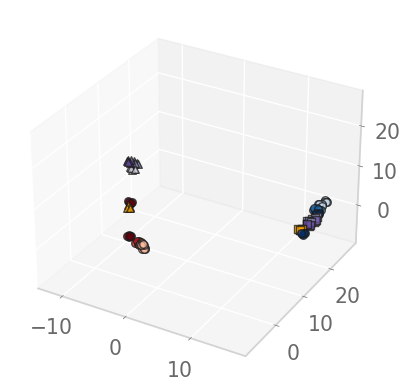

noisy_altT_eps0.5_volweight_mf_21


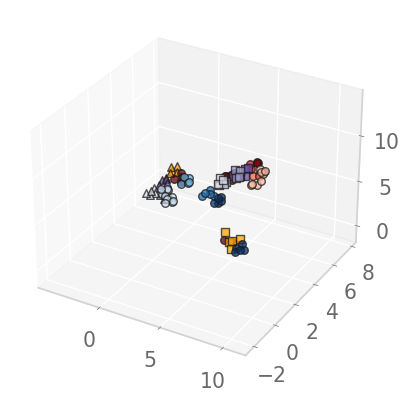

noisy_altT_eps0.5_volweight_mb_1


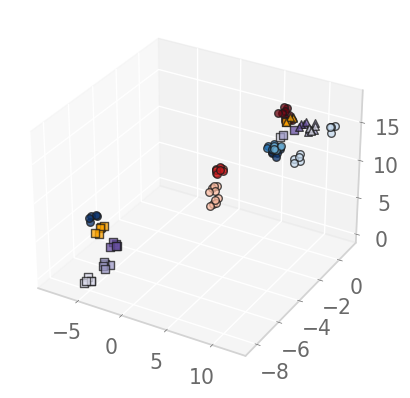

noisy_altT_eps0.5_volweight_mb_7


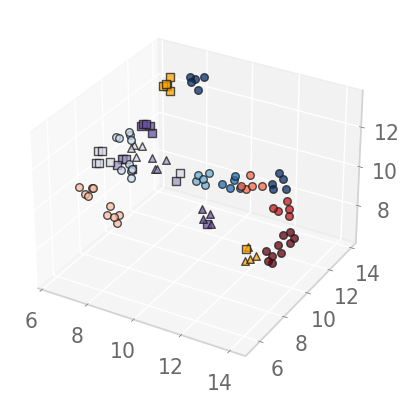

noisy_altT_eps0.5_volweight_mf_3


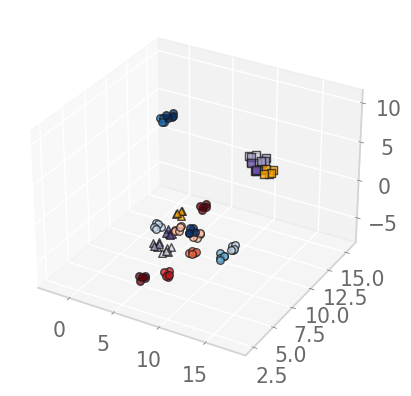

noisy_altT_eps0.5_volweight_mb_22


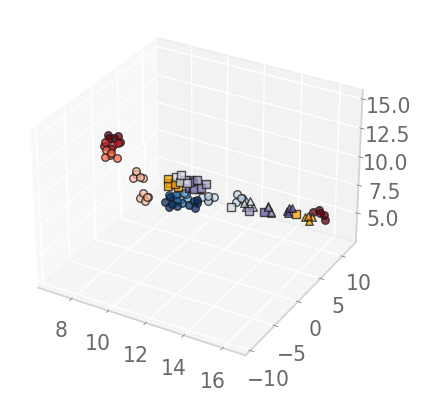

noisy_altT_eps0.5_volweight_mb_11


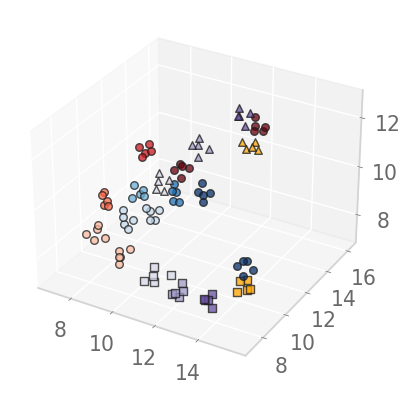

noisy_altT_eps0.5_volweight_mb_14


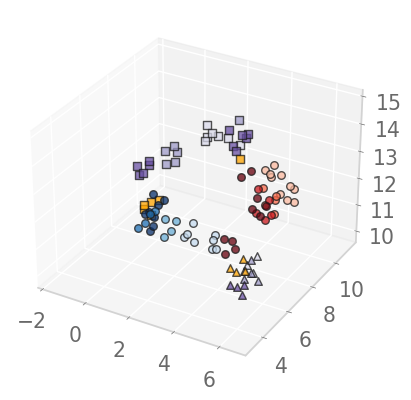

noisy_altT_eps0.5_volweight_mf_1


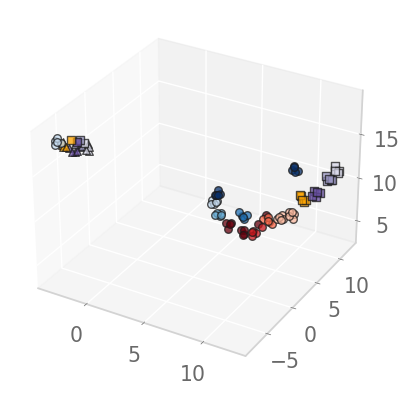

noisy_altT_eps0.5_volweight_mf_7


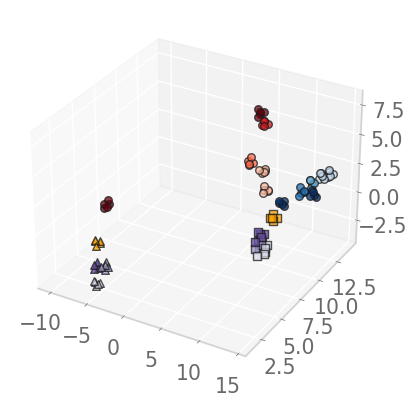

noisy_altT_eps0.5_volweight_mb_6


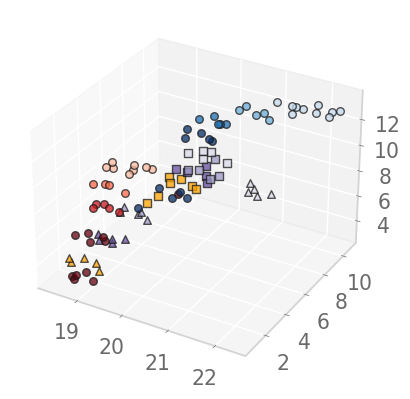

noisy_altT_eps0.5_volweight_mf_22


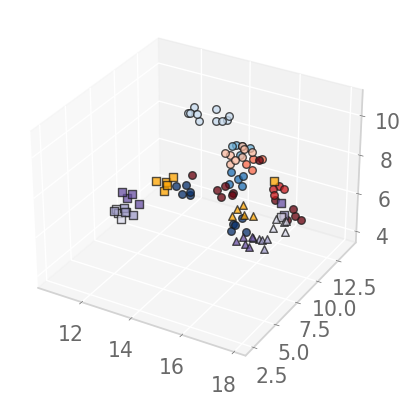

noisy_altT_eps0.5_volweight_mf_11


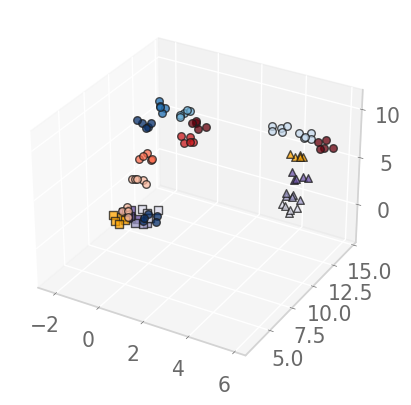

noisy_altT_eps0.5_volweight_mb_13


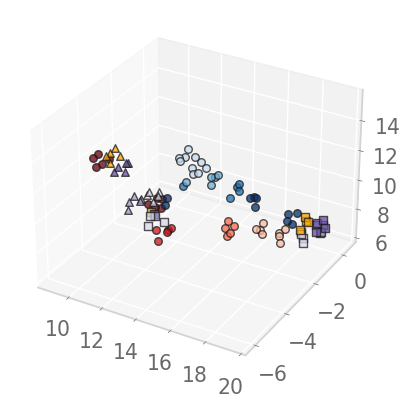

noisy_altT_eps0.5_volweight_mb_4


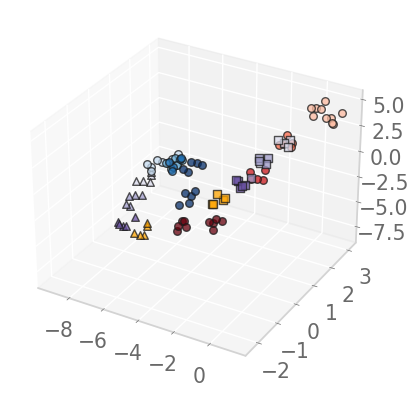

noisy_altT_eps0.5_volweight_mf_14


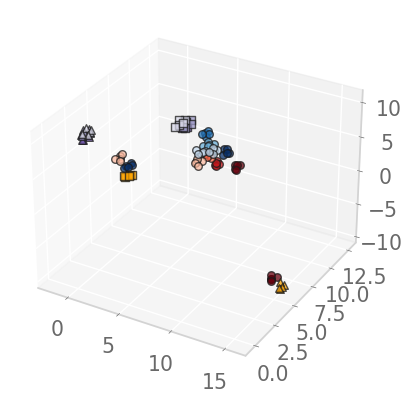

noisy_altT_eps0.5_volweight_mb_17


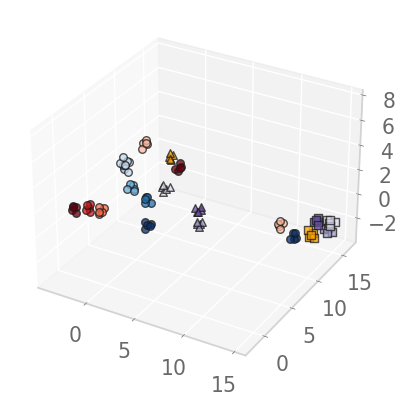

noisy_altT_eps0.5_volweight_mf_9


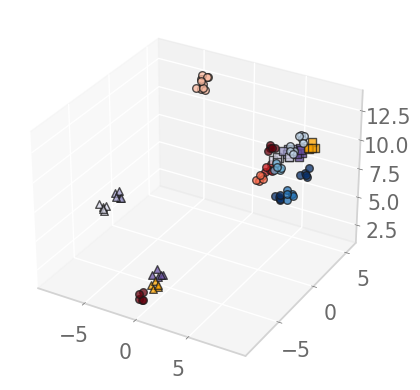

noisy_altT_eps0.5_volweight_mb_2


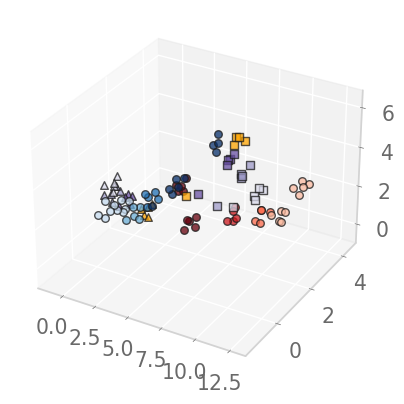

noisy_altT_eps0.5_volweight_mf_5


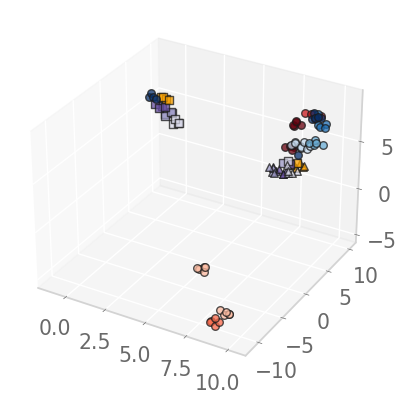

noisy_altT_eps0.5_volweight_mb_25


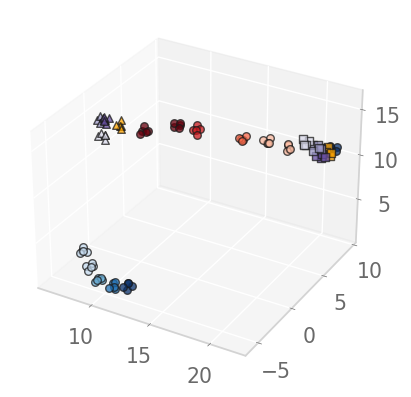

noisy_altT_eps0.5_volweight_mf_13


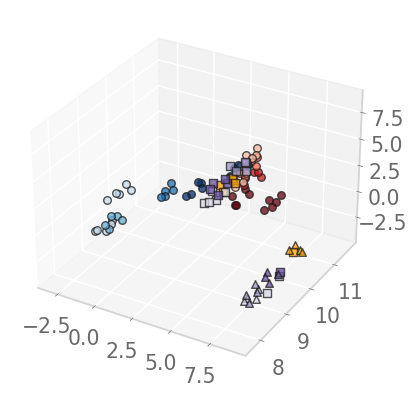

noisy_altT_eps0.5_volweight_mb_29


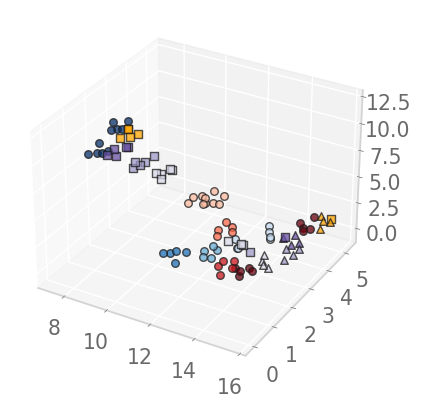

noisy_altT_eps0.5_volweight_mf_4


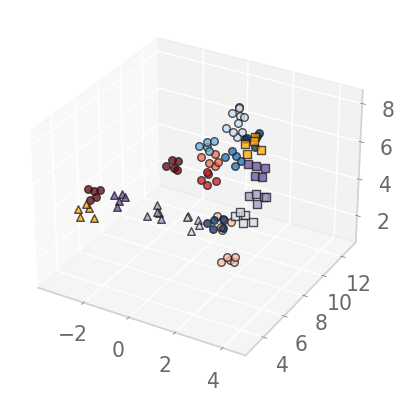

noisy_altT_eps0.5_volweight_mf_12


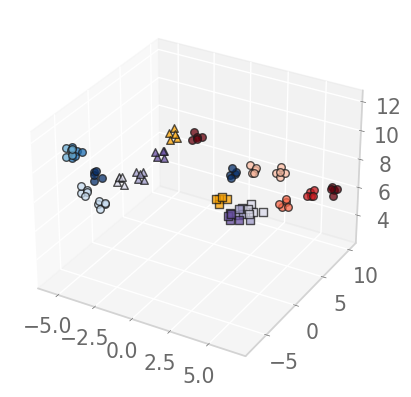

noisy_altT_eps0.5_volweight_mb_0


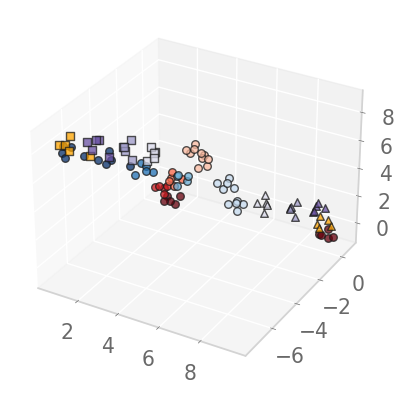

noisy_altT_eps0.5_volweight_mf_28


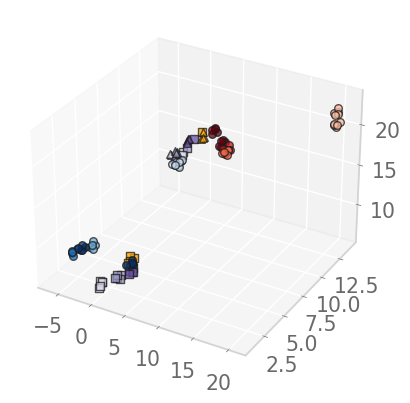

noisy_altT_eps0.5_volweight_mb_10


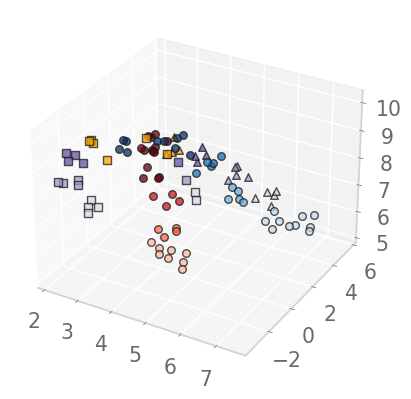

noisy_altT_eps0.5_volweight_mb_15


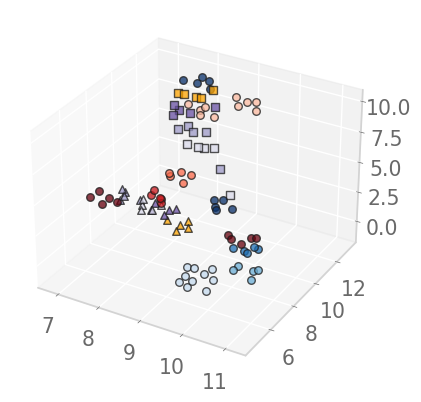

noisy_altT_eps0.5_volweight_mf_17


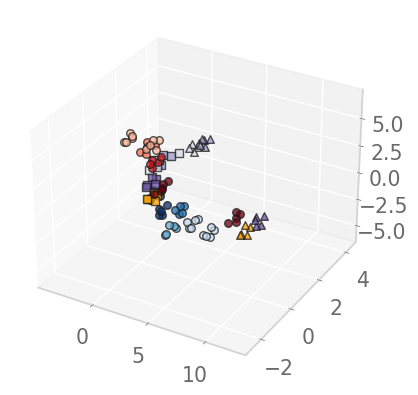

noisy_altT_eps0.5_volweight_mf_25


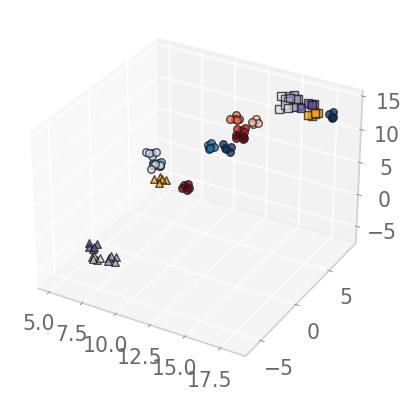

noisy_altT_eps0.5_volweight_mf_30


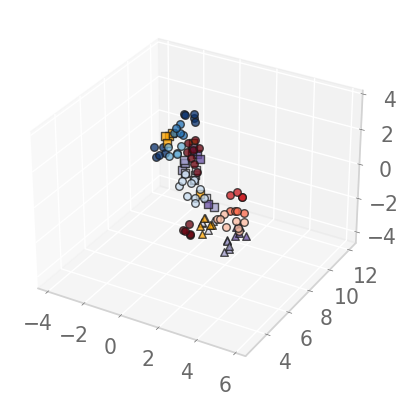

noisy_altT_eps0.5_volweight_mf_8


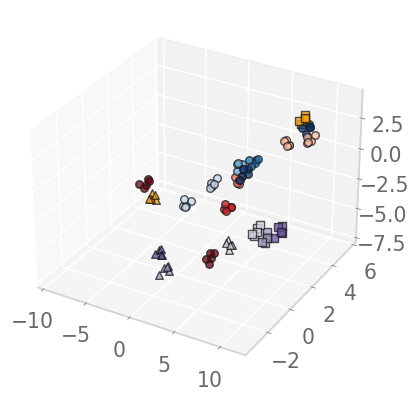

noisy_altT_eps0.5_volweight_mb_20


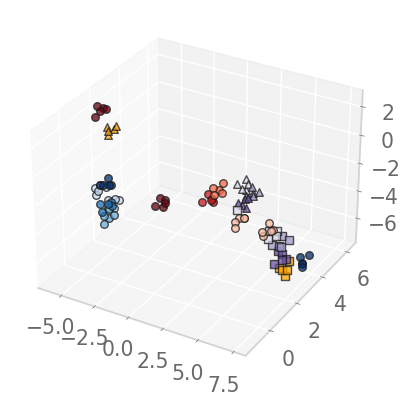

noisy_altT_eps0.5_volweight_mb_12


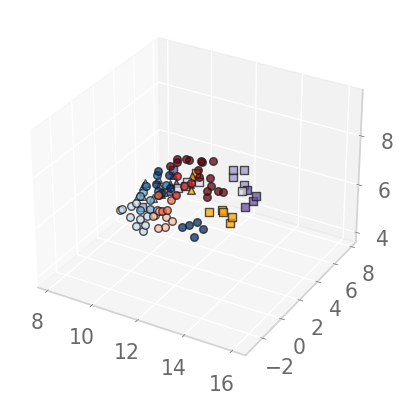

noisy_altT_eps0.5_volweight_mb_24


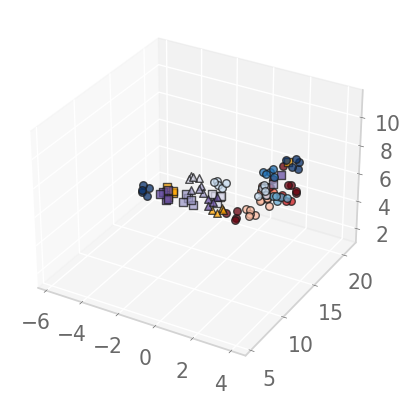

noisy_altT_eps0.5_volweight_mb_28


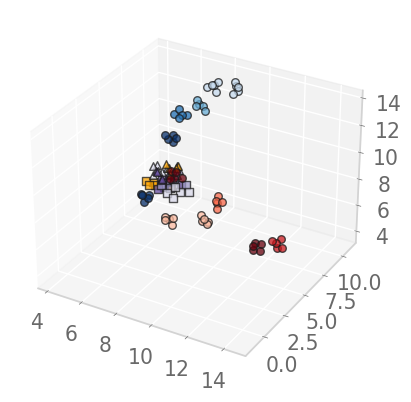

noisy_altT_eps0.5_volweight_mf_6


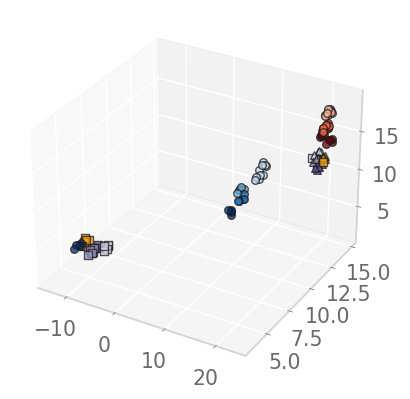

noisy_altT_eps0.5_volweight_mf_20


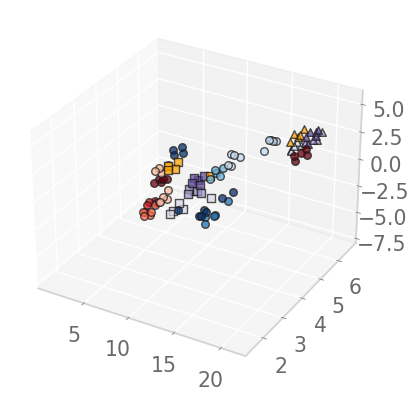

noisy_altT_eps0.5_volweight_mb_3


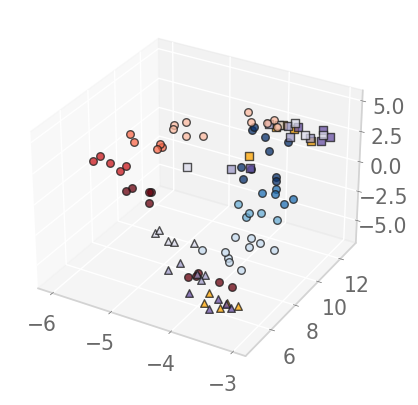

noisy_altT_eps0.5_volweight_mb_16


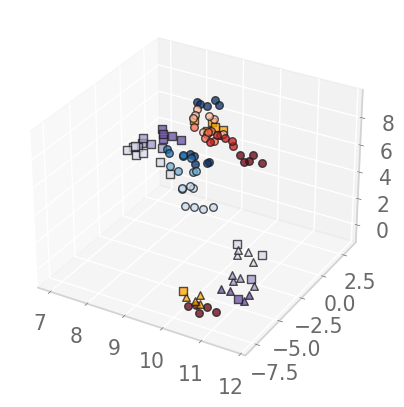

noisy_altT_eps0.5_volweight_mf_0


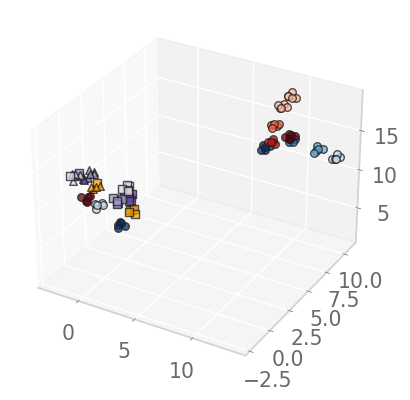

noisy_altT_eps0.5_volweight_mf_29


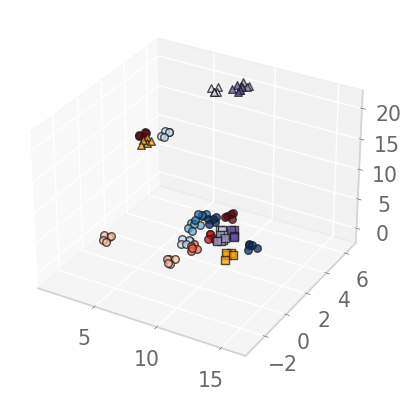

noisy_altT_eps0.5_volweight_mf_18


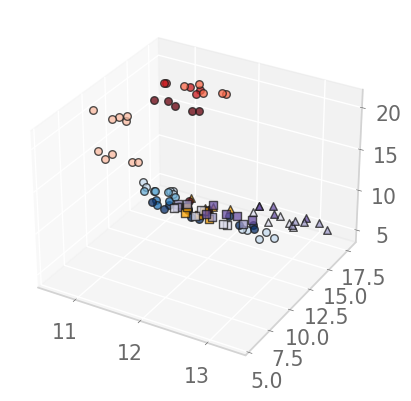

noisy_altT_eps0.5_volweight_mb_31


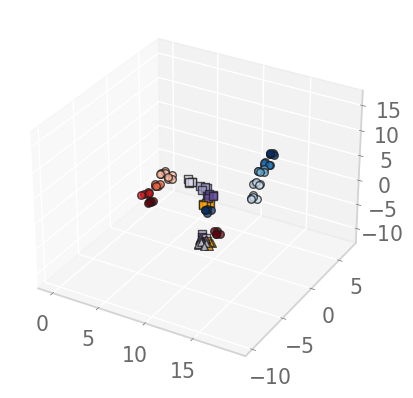

noisy_altT_eps0.5_volweight_mb_9


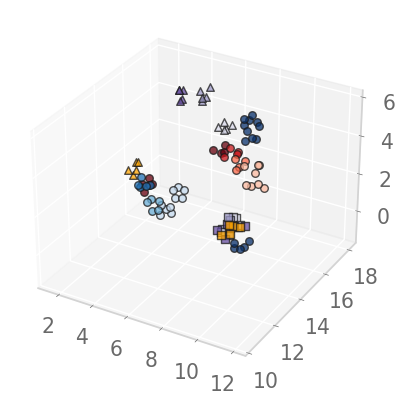

noisy_altT_eps0.5_volweight_mf_2


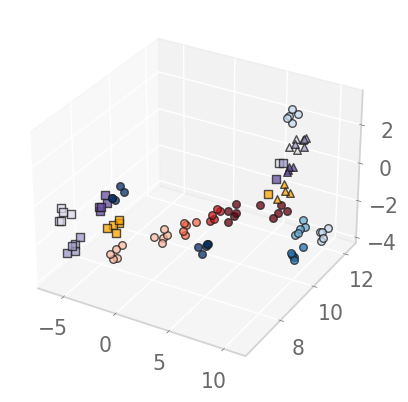

noisy_altT_eps0.5_volweight_mf_27


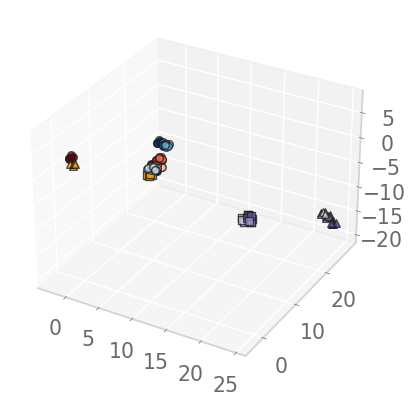

noisy_altT_eps0.5_volweight_mf_26


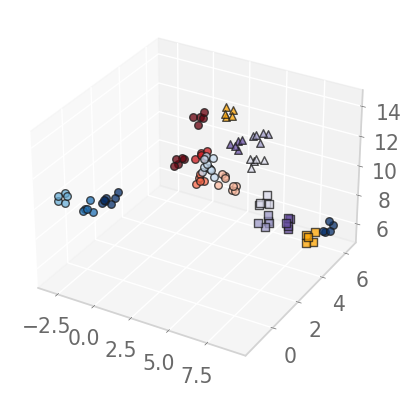

noisy_altT_eps0.5_volweight_mf_15


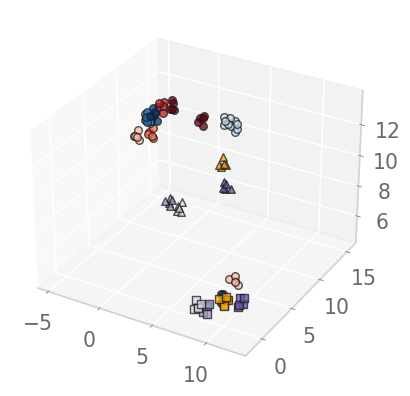

noisy_altT_eps0.5_volweight_mb_5


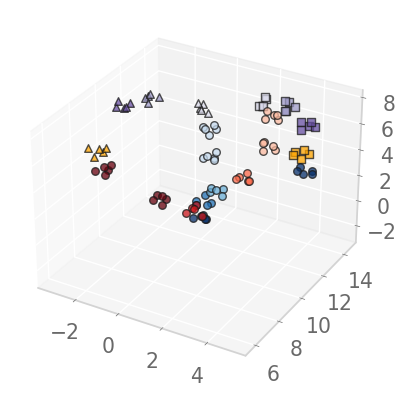

noisy_altT_eps0.5_volweight_mb_27


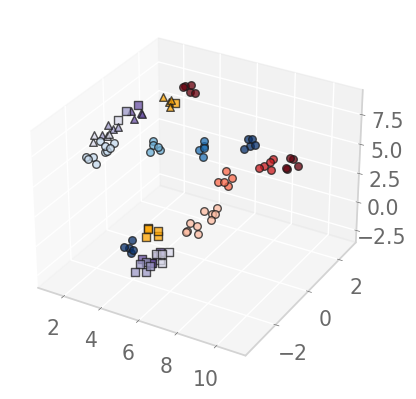

noisy_altT_eps0.5_volweight_mb_18


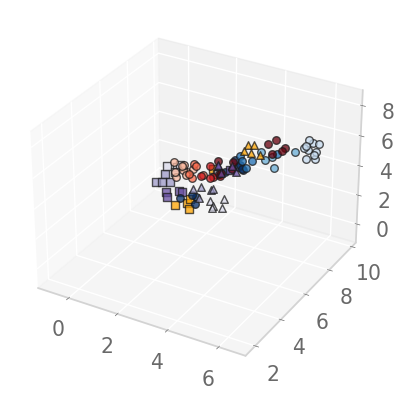

noisy_altT_eps0.5_volweight_mb_8


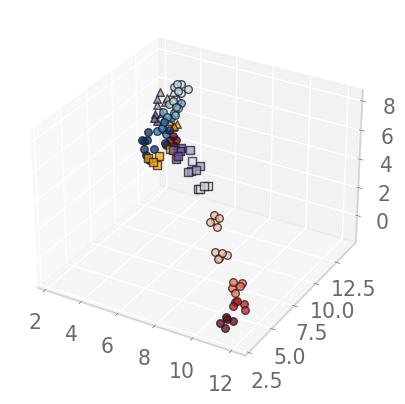

noisy_altT_eps0.5_volweight_mb_19


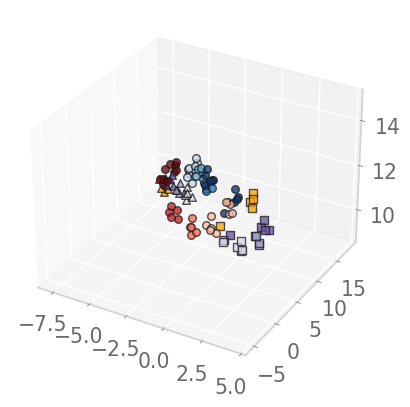

noisy_altT_eps0.5_volweight_mf_31


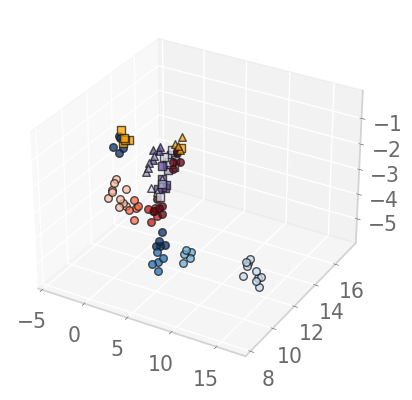

noisy_altT_eps0.5_volweight_mf_19


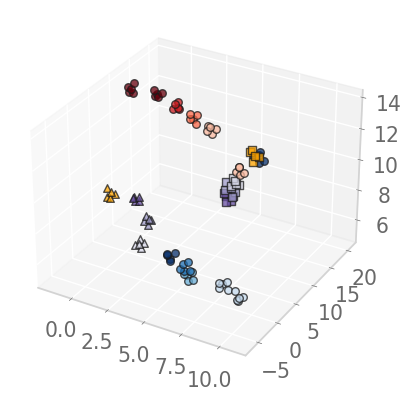

In [17]:
corr = []
stem_loc = []
score = []
model = []
for model_name in os.listdir(nnets_dir):
    print(model_name)
    if 'altT' not in model_name: continue
    if ('mf' not in model_name) and ('mb' not in model_name): continue
    fname = f'{generic_exp_name}_mb' if 'mb' in model_name else f'{generic_exp_name}_mf'
    #fname = f'noisy_altT_mb' if 'mb' in model_name else f'noisy_altT_mf'
    
    with open(f'{engram_dir}params/{fname}.yaml', 'r') as f:
        parameters = yaml.safe_load(f)
    parameters['fname'] = f'{exp_name}/{model_name}'
    parameters['internal_dim'] = internal_dim
    env = Env(                                                                     
        give_rewards=parameters['figure8_give_rewards'],                           
        higher_dim_obs=parameters['higher_dim_obs'],                               
        show_rewards=parameters['show_rewards'], plotfig=False,
        obs_noise=0.
        ) 
    rng = np.random.RandomState()
    learning_algo = CRAR(                                                          
        env, parameters['freeze_interval'], parameters['batch_size'], rng,         
        internal_dim=parameters['internal_dim'], lr=parameters['learning_rate'],
        nn_yaml=parameters['nn_yaml'], yaml_mods=parameters['yaml_mods'],          
        double_Q=True, loss_weights=parameters['loss_weights'],                    
        encoder_type=parameters['encoder_type'], mem_len=parameters['mem_len'],
        train_len=parameters['train_len']  
        )   
    train_policy = EpsilonGreedyPolicy(                                     
        learning_algo, env.nActions(), rng, epsilon=1.)             
    test_policy = EpsilonGreedyPolicy(                                      
        learning_algo, env.nActions(), rng, 0.)  
    agent = NeuralAgent(                                                        
        env, learning_algo, parameters['replay_memory_size'], 1,                
        parameters['batch_size'], rng, save_dir=engram_dir,                     
        train_policy=train_policy, test_policy=test_policy)
    agent.attach(bc.LearningRateController(                                     
        initial_learning_rate=parameters['learning_rate'],                      
        learning_rate_decay=parameters['learning_rate_decay'],                  
        periodicity=1))                                                         
    agent.attach(bc.TrainerController(                                          
        evaluate_on='action',  periodicity=parameters['update_frequency'],      
        show_episode_avg_V_value=True, show_avg_Bellman_residual=True))         
    best_controller = bc.FindBestController(                                    
        validationID=Env.VALIDATION_MODE, testID=None, unique_fname=fname)      
    agent.attach(best_controller)                                               
    agent.attach(bc.InterleavedTestEpochController(                             
        id=Env.VALIDATION_MODE, epoch_length=parameters['steps_per_test'],      
        periodicity=1, show_score=True, summarize_every=10, unique_fname=fname))
    try:
        agent.setNetwork(parameters['fname'] + '/fname', nEpoch=40)
    except:
        print(f'Skipping {model_name}')

    agent._in_episode = True
    agent._mode = 0 # Testing mode with plan_depth=0
    initState = env.reset(agent._mode)
    inputDims = env.inputDimensions()
    for i in range(len(inputDims)):
        if inputDims[i][0] > 1:
            agent._state[i][1:] = initState[i][1:]
    agent._Vs_on_last_episode = []
    is_terminal = False
    reward = 0

    xs = []
    ys = []
    latents = []
    reward_locs = []
    for i in range(100):
        obs = env.observe()
        for i in range(len(obs)):
            agent._state[i] = obs[i]    

            state = torch.as_tensor(agent._state).float()
            zs = torch.as_tensor(agent._latent).float()
            latent = agent._learning_algo.crar.encoder(state, zs=zs)
            latent = latent.detach().cpu().numpy()
            loc = list(np.unravel_index(
                np.argmax(obs[i]), obs[i].shape))
            xs.append(loc[0]-1)
            ys.append(loc[1]-1)
            latents.append(latent)
            reward_locs.append(env._reward_location)
            agent._latent[0, 0:-1] = agent._latent[0, 1:]
            agent._latent[0, -1] = latent

        V, action, reward_received = agent._step()
        reward += reward_received
        agent._Vs_on_last_episode.append(V)
        is_terminal = env.inTerminalState()
        if is_terminal: break     
    xs = np.array(xs)
    ys = np.array(ys)
    latents = np.array(latents).squeeze()
    reward_locs = np.array(reward_locs)
    
    reducer = UMAP(
        n_neighbors=20, n_components=3, metric='euclidean',
        n_epochs=1000, learning_rate=1.0,
        min_dist=0.5
        )
    reduced_latents = reducer.fit_transform(latents)
    
    %matplotlib inline
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')  # 3d
    colors = ['orange', cm.get_cmap('Blues'), cm.get_cmap('Reds'), cm.get_cmap('Purples')]
    color_steps = np.linspace(0.25, 1., env.HEIGHT, endpoint=True)
    markers = ['s', '^', 'o']
    for i in np.arange(reduced_latents.shape[0]):
        if xs[i] == env.CENTRAL_STEM:
            marker = markers[reward_locs[i]]
        else:
            marker = markers[-1]
        color_label = env._space_label[xs[i], ys[i]]
        if color_label == 0:
            color=colors[0]
        else:
            color_step = color_steps[ys[i]]
            color = colors[color_label](color_step)
        ax.scatter(
            reduced_latents[i,0], reduced_latents[i,1], reduced_latents[i,2],
            color=color,
            marker=marker, edgecolors='k', alpha=0.75, s=30
            )
    plt.show()

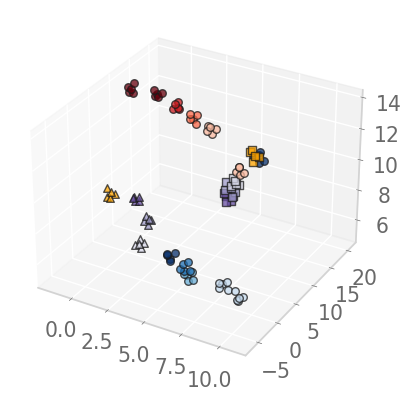

In [18]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')  # 3d
colors = ['orange', cm.get_cmap('Blues'), cm.get_cmap('Reds'), cm.get_cmap('Purples')]
color_steps = np.linspace(0.25, 1., env.HEIGHT, endpoint=True)
markers = ['s', '^', 'o']
for i in np.arange(reduced_latents.shape[0]):
    if xs[i] == env.CENTRAL_STEM:
        marker = markers[reward_locs[i]]
    else:
        marker = markers[-1]
    color_label = env._space_label[xs[i], ys[i]]
    if color_label == 0:
        color=colors[0]
    else:
        color_step = color_steps[ys[i]]
        color = colors[color_label](color_step)
    ax.scatter(
        reduced_latents[i,0], reduced_latents[i,1], reduced_latents[i,2],
        color=color,
        marker=marker, edgecolors='k', alpha=0.75, s=30
        )
plt.show()